# Исследование объявлений о продаже квартир


>[Исследование объявлений о продаже квартир](#scrollTo=9cIJDqQhZlB3)

>>[Шаг 1. Откройте файл с данными и изучите общую информацию](#scrollTo=Bi-NNcOTZlB5)

>>>[Задание 1.1. Загрузите данные из файла в датафрейм.](#scrollTo=XlvPhdpdZlB6)

>>>[Задание 1.2. Изучите общую информацию о полученном датафрейме.](#scrollTo=BvmaNfTQZlB-)

>>>[Задание 1.3. Постройте общую гистограмму для всех числовых столбцов таблицы.](#scrollTo=UbPEUUfVZlB_)

>>[Шаг 2. Предобработка данных](#scrollTo=0Gr3L89wZlCA)

>>>[Задание 2.1. Найдите и изучите пропущенные значения в столбцах.](#scrollTo=25oQ7p5GZlCA)

>>>[Задание 2.2. Рассмотрите типы данных в каждом столбце.](#scrollTo=PUHLNenQZlCQ)

>>>[Задание 2.3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.](#scrollTo=ZbENv6urZlCS)

>>>[Задание 2.4. Найдите и устраните редкие и выбивающиеся значения.](#scrollTo=hHpmb7ebZlCT)

>>[Шаг 3. Добавьте в таблицу новые столбцы](#scrollTo=1d0gdkMJZlCb)

>>[Шаг 4. Исследовательский анализ данных](#scrollTo=-dDBw7ocZlCg)

>>>[Задание 4.1. Изучить параметры объектов](#scrollTo=QZNX4EdmZlCg)

>>>[Задание 4.2. Изучите, как быстро продавались квартиры (столбец 'days_exposition')](#scrollTo=t39yltMHZlCz)

>>>[Задание 4.3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?](#scrollTo=mXM5Jn1GZlC1)

>>>[Задание 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.](#scrollTo=B2jyvR-AZlDE)

>>>[Задание 4.5.  Вычислите среднюю цену каждого километра от центра Санкт-Петербурга.](#scrollTo=EdMLRTqnZlDG)

>>[Шаг 5. Общий вывод](#scrollTo=73gNKMUiZlDJ)



В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

На основе данных сервиса Яндекс.Недвижимость обнаружить и описать закономерности в данных о продаже квартир в Санкт-Петербурга.  
\
Исследование пройдёт в пять этапов:

1. Шаг 1. Откройте файл с данными и изучите общую информацию.
2. Шаг 2. Предобработка данных.
3. Шаг 3. Добавьте в таблицу новые столбцы.
4. Шаг 4. Исследовательский анализ данных.
5. Шаг 5. Общий вывод.

## Шаг 1. Откройте файл с данными и изучите общую информацию

### Задание 1.1. Загрузите данные из файла в датафрейм.

In [ ]:
import pandas as pd  # импортируем библиотеку pandas
import numpy as np   # и библиотеку numpy
import matplotlib.pyplot as plt # импортируем модуль pyplot библиотеки matplotlib

In [ ]:
pd.set_option('display.max_columns', None) # код для того, чтобы отображались все сттолбцы датафрейма при выводе их на экран

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла с данными и сохранение в data

### Задание 1.2. Изучите общую информацию о полученном датафрейме.

In [ ]:
data.head() # выведем первые 5 строк датафрейма data на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info() # выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод к заданию 2.** В датафрейме 23699 строк. Видим, что пропуски есть в следующих столбцах: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

### Задание 1.3. Постройте общую гистограмму для всех числовых столбцов таблицы.

Диаграмма для колонки first_day_exposition не может быть отображена
Диаграмма для колонки is_apartment не может быть отображена
Диаграмма для колонки studio не может быть отображена
Диаграмма для колонки open_plan не может быть отображена
Диаграмма для колонки locality_name не может быть отображена


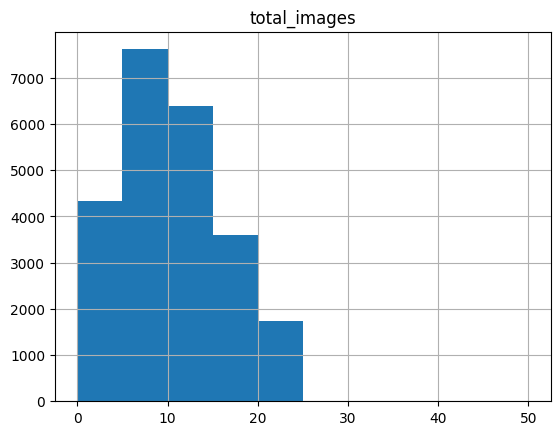

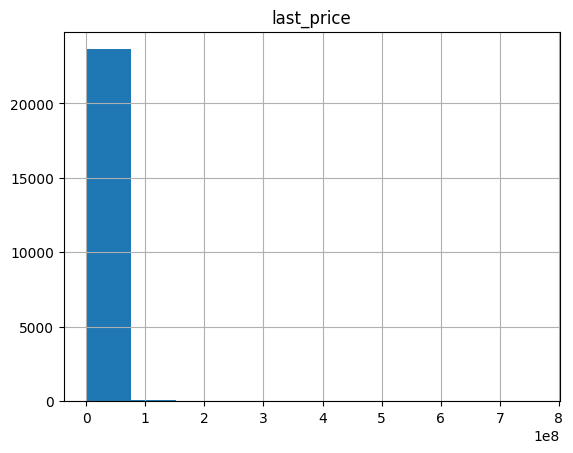

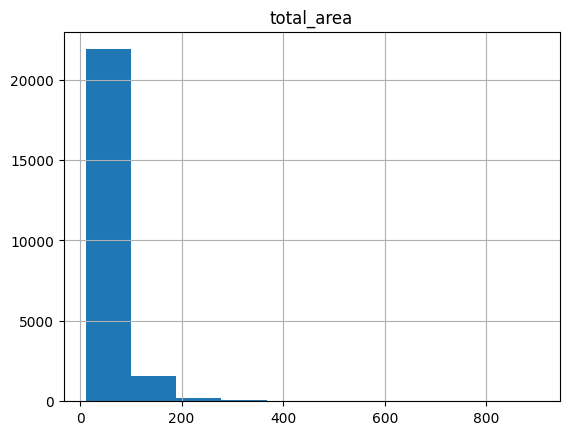

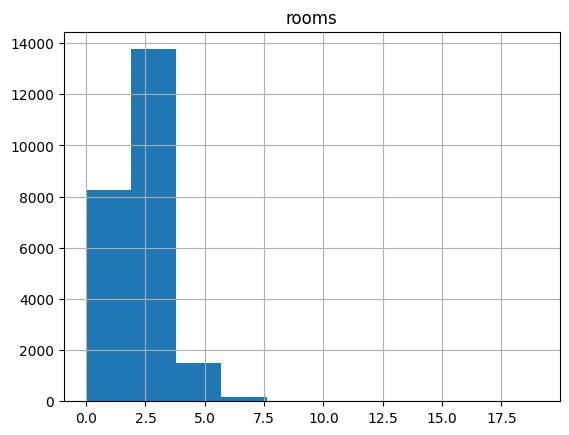

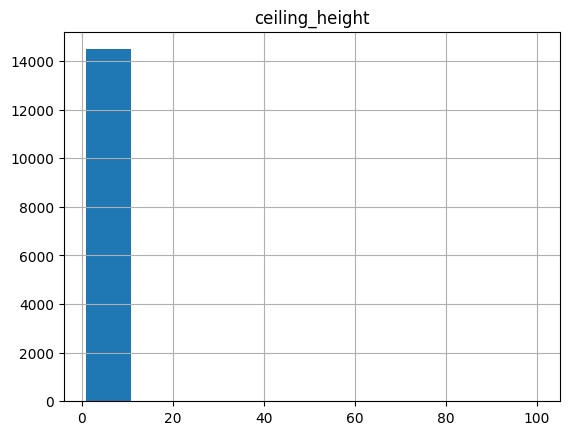

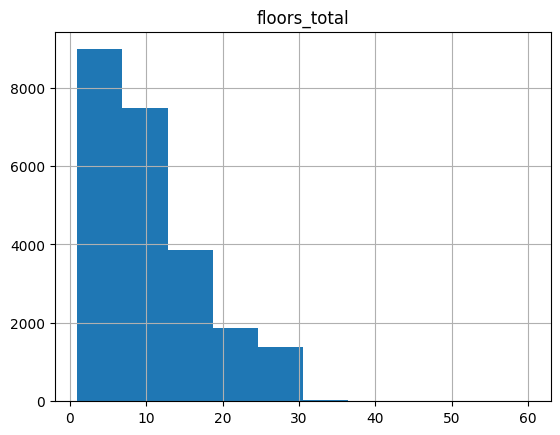

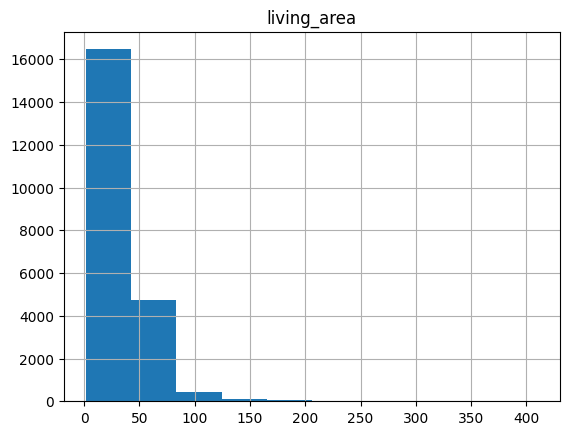

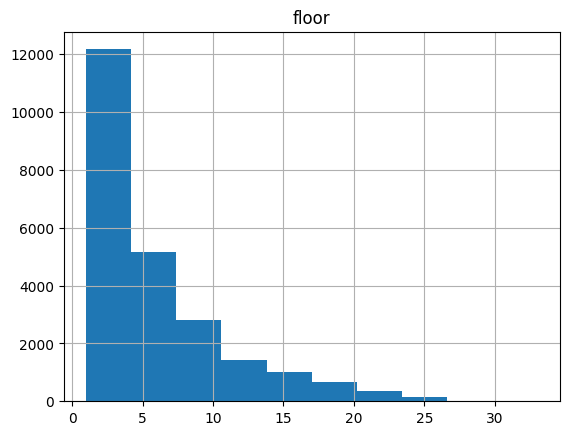

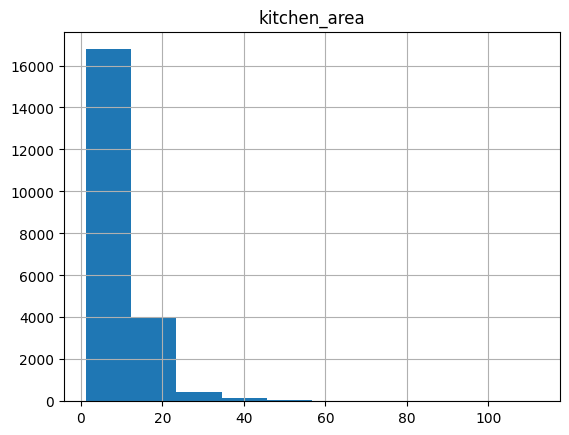

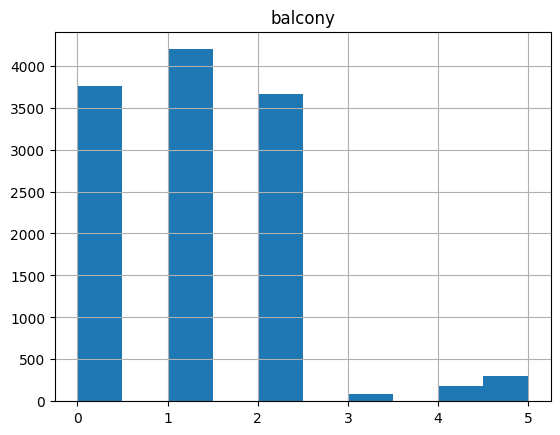

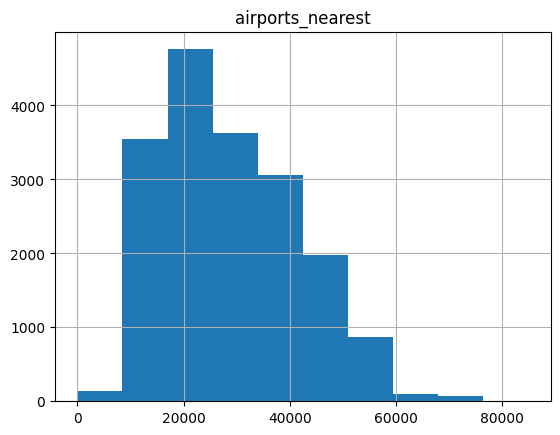

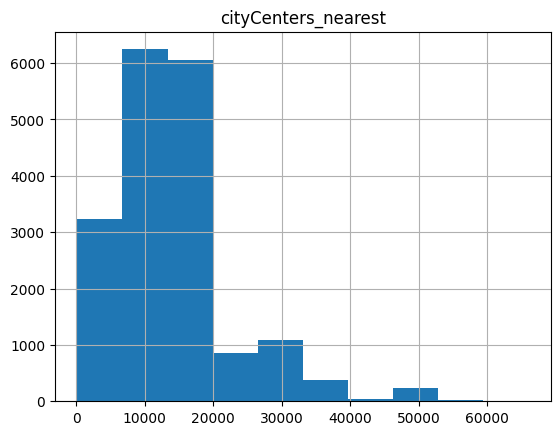

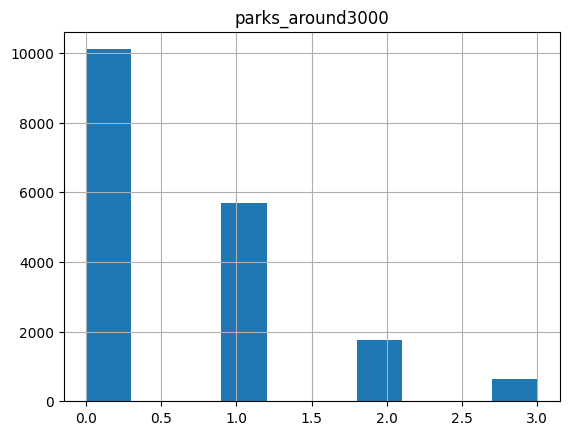

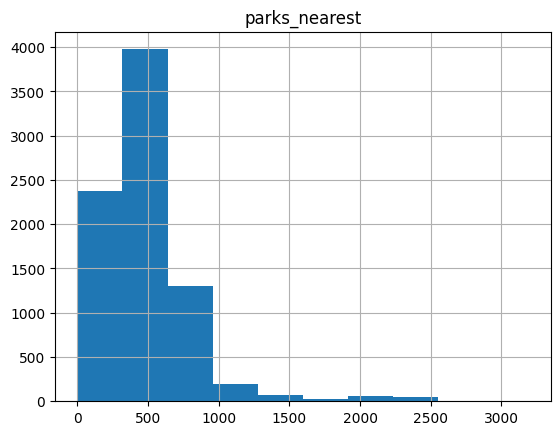

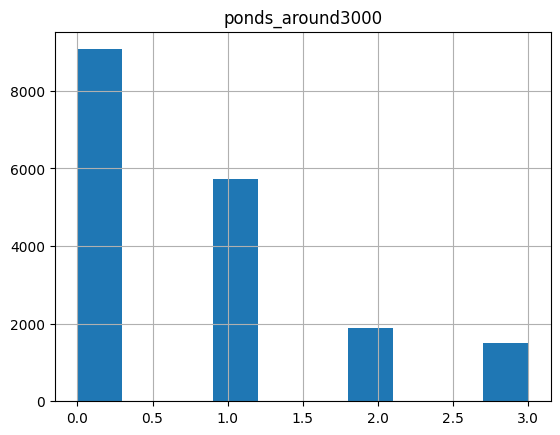

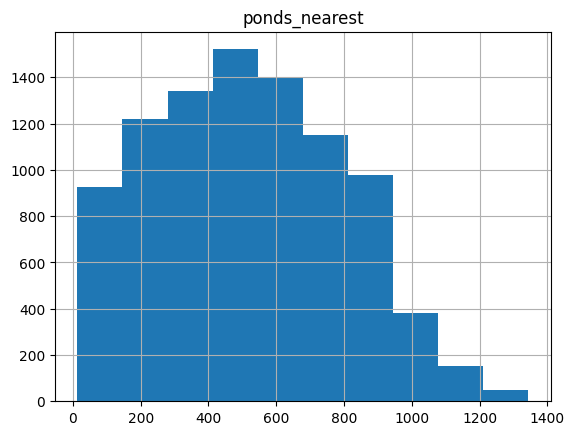

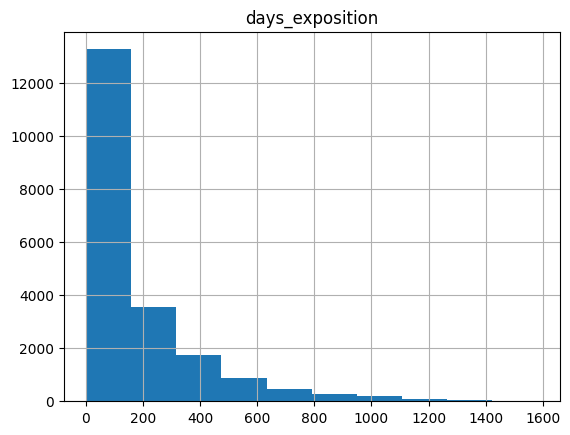

In [ ]:
for column in range(len(data.columns)):
    try:
        data.hist(data.columns[column])
    except:
        print(f'Диаграмма для колонки {data.columns[column]} не может быть отображена')

**Вывод.** Получилось построить гистограммы не для всех столбцов. Причиной этого является тип данных в этих слолбцах: object и bool. Для остальных столбцов датафрейма с типом данных float64 и int64 построить гистограммы удалось.

**Вывод к шагу 1.**

В датафрейме 'data' мы обнаружили пропуски в 14 из 22 столбцов.
Также построили гистограммы для столбцов с типом данных int64 и float64.

## Шаг 2. Предобработка данных

### Задание 2.1. Найдите и изучите пропущенные значения в столбцах.

In [ ]:
data.isna().sum() # определили, какое количество пропусков в каждом из столбцов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***Заполним пропущенные значения там, где это возможно***

**Рассмотрим столбец 'ceiling_height'**

В столбце 'ceiling_height' отображается высота потолков, это количественная переменная. Оставим этот столбец без заполнения пропусков.

**Рассмотрим столбец 'floors_total'**

В столбце 'floors_total' отображается количество этажей в доме, это количественная переменная. Оставим этот столбец без заполнения пропусков.

**Рассмотрим столбец 'living_area'**

В столбце 'living_area' отображается жилая площадь, это количественная переменная. Оставим этот столбец без заполнения пропусков.

**Рассмотрим столбец 'is_apartment'**

In [ ]:
data['is_apartment'].unique() # отобразим уникальные значения данного столбца

array([nan, False, True], dtype=object)

Столбец 'is_apartment' показывает, является ли квартира апартаментами или нет: если стоит значение True, значит это апартаменты; если False, значит нет. В столбце 'is_apartment' категориальная переменная. Видим, что есть 3 уникальных значения: nan, False и True.
Заполнять пропуски в этой колонке не будем.

**Рассмотрим столбец 'kitchen_area'**

В столбце 'kitchen_area' отображается площадь кухни в квадратных метрах (м²), это количественная переменная. Оставим этот столбец без заполнения пропусков.

**Рассмотрим столбец 'balcony'**

В столбце 'balcony' отображается число балконов, это количественная переменная. Оставим этот столбец без заполнения пропусков.

**Рассмотрим столбец 'locality_name'**

In [ ]:
data['locality_name'].unique() # отобразим уникальные значения данного столбца

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце 'locality_name' отображаются названия населённых пунктов, это категориальная переменная. Заполним пропуски значением 'unknown'.

In [ ]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [ ]:
data['locality_name'].isna().sum() # посчитаем количество пропущенных значений в данном столбце

0

**Рассмотрим столбец 'airports_nearest'**

В столбце 'airports_nearest' отображается расстояние до ближайшего аэропорта в метрах. Это количественная переменная. Заполнять пропуски не будем.

**Рассмотрим столбец 'cityCenters_nearest'**

В столбце 'cityCenters_nearest' отображается расстояние до центра города. Это количественная переменная. Заполнять пропуски не будем.

**Рассмотрим столбец 'parks_around3000'**

В столбце 'parks_around3000' отображается число парков в радиусе 3 км. Это количественная переменная. Заполнять пропуски не будем.

**Рассмотрим столбец 'parks_nearest'**

В столбце 'parks_nearest' отображается расстояние до ближайшего парка (м). Это количественная переменная. Заполнять пропуски не будем.

**Рассмотрим столбец 'ponds_around3000'**

В столбце 'ponds_around3000' отображается число водоёмов в радиусе 3 км. Это количественная переменная. Заполнять пропуски не будем.

**Рассмотрим столбец 'ponds_nearest'**

В столбце 'ponds_nearest' отображается расстояние до ближайшего водоёма (м). Это количественная переменная. Заполнять пропуски не будем.

**Рассмотрим столбец 'days_exposition'**

В столбце 'days_exposition' отображается сколько дней было размещено объявление (от публикации до снятия). Это количественная переменная. Заполнять пропуски не будем.

***Причиной появления пропусков в данных может быть техническая причина, либо человеческий фактор.***

### Задание 2.2. Рассмотрите типы данных в каждом столбце.

In [ ]:
data.info() # отобразим атрибуты датафрейма методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Рассмотрим столбец 'first_day_exposition'**

Данный столбец отображает дату публикации объявления. Тип данных в данном столбце должен быть 'datetime64'. Изменим его.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
data.info() # проверяем, изменился ли тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Задание 2.3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

Избавимся от неявных значений в столбце 'locality_name'

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '')\
.str.replace('посёлок городского типа ', '').str.replace('коттеджный посёлок ', '')\
.str.replace('коттеджный поселок ', '').str.replace('садовое товарищество ', '')\
.str.replace('деревня ', '').str.replace('садоводческое некоммерческое товарищество ', '')\
.str.replace('поселок станции ', '').str.replace('городской посёлок ', '')\
.str.replace('городской поселок ', '').str.replace('село ','')\
.str.replace('посёлок при железнодорожной станции ', '')\
.str.replace('поселок ', '').str.replace('посёлок ', '')


In [ ]:
data['locality_name'].unique() # отобразим уникальные значения столбца 'locality_name'

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Задание 2.4. Найдите и устраните редкие и выбивающиеся значения.

In [ ]:
data.describe() # отобразим список характеристик значений столбцов датафрейма data

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
old_data = data.copy() # создадим копию data под названием old_data перед совершением действий по удалению аномальных значений,
# чтобы потом посчитать % данных, которые мы удалили

**Рассмотрим столбец 'last_price'**

Видим, что аномальные данные присутствуют. Оставим значения, которые больше 0.5 перцентиля и меньше 99.5 перцентиля, а также значения с пропусками.

In [ ]:
data = data[(data['last_price'].isna()) | ((data['last_price']>data['last_price'].quantile(0.005)) &\
                                           (data['last_price']<data['last_price'].quantile(0.995)))]

In [ ]:
data.describe() # отобразим список характеристик значений столбцов датафрейма data, чтобы проверить, как изменились данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23456.000000,2.345600e+04,23456.000000,23456.000000,14375.000000,23370.000000,21591.000000,23456.000000,21221.000000,12078.000000,18041.00000,18062.000000,18063.000000,7986.000000,18063.000000,9008.000000,20318.000000
mean,9.849250,6.051619e+06,59.412119,2.060454,2.767784,10.726316,33.968788,5.911238,10.466957,1.153171,28808.38734,14254.617207,0.604717,492.159404,0.763273,519.863233,180.258736
std,5.676495,5.082551e+06,31.342117,1.058113,1.264259,6.602930,20.002167,4.896112,5.449043,1.071689,12665.05848,8598.481831,0.795558,342.209992,0.933385,277.920202,219.265532
min,0.000000,8.200000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.00000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.00000,9377.000000,0.000000,288.000000,0.000000,296.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26758.00000,13145.000000,0.000000,456.000000,0.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.300000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,2.000000,37347.00000,16318.000000,1.000000,613.000000,1.000000,733.000000,230.000000
max,50.000000,5.400000e+07,517.000000,19.000000,100.000000,60.000000,332.000000,33.000000,100.700000,5.000000,84869.00000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Рассмотрим столбец 'ceiling_height'**

Видим, что аномальные данные присутствуют. Оставим значения, которые больше 0.5 перцентиля и меньше 99.5 перцентиля, а также значения с пропусками.

In [ ]:
data = data[(data['ceiling_height'].isna()) |\
             ((data['ceiling_height']>data['ceiling_height'].quantile(0.005))&\
            (data['ceiling_height']<data['ceiling_height'].quantile(0.995)))]

In [ ]:
data.describe() # отобразим список характеристик значений столбцов датафрейма data, чтобы проверить, как изменились данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23286.000000,2.328600e+04,23286.000000,23286.000000,14205.000000,23200.000000,21433.000000,23286.000000,21071.000000,11990.000000,17920.000000,17940.000000,17941.000000,7910.000000,17941.000000,8932.000000,20182.000000
mean,9.849437,6.036682e+06,59.339822,2.058662,2.717250,10.753793,33.903709,5.922657,10.463952,1.151460,28822.302790,14277.113768,0.602531,492.159924,0.760883,520.196373,180.092706
std,5.666033,5.047284e+06,31.224980,1.057015,0.245637,6.603334,19.909722,4.902483,5.436407,1.070652,12672.093319,8584.337741,0.794232,343.245282,0.931613,278.001318,219.232354
min,0.000000,8.200000e+05,12.000000,0.000000,2.490000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18522.000000,9421.750000,0.000000,288.000000,0.000000,297.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26786.000000,13149.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000e+06,69.200000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,2.000000,37364.000000,16333.000000,1.000000,613.000000,1.000000,733.000000,230.000000
max,50.000000,5.400000e+07,517.000000,19.000000,3.980000,60.000000,332.000000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Рассмотрим столбец 'floors_total'**

Видим, что аномальные данные присутствуют. Оставим значения, которые меньше 99.5 перцентиля, а также значения с пропусками.

In [ ]:
data = data[(data['floors_total'].isna()) | (data['floors_total'] < data['floors_total'].quantile(0.995))]

In [ ]:
data.describe() # отобразим список характеристик значений столбцов датафрейма data, чтобы проверить, как изменились данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23070.000000,2.307000e+04,23070.000000,23070.000000,14111.000000,22984.000000,21229.000000,23070.000000,20870.000000,11870.000000,17785.000000,17805.000000,17806.000000,7901.000000,17806.000000,8869.000000,19995.000000
mean,9.853879,6.048134e+06,59.441327,2.064023,2.717553,10.587887,33.999745,5.827048,10.454564,1.149115,28753.158729,14241.552429,0.606425,492.118593,0.759351,521.218176,180.251763
std,5.668996,5.065178e+06,31.304263,1.058160,0.246315,6.397085,19.951094,4.763021,5.450042,1.072958,12619.071958,8599.580681,0.795304,343.414494,0.929042,277.599591,219.572856
min,0.000000,8.200000e+05,12.000000,0.000000,2.490000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.700000,2.000000,7.000000,0.000000,18490.000000,9380.000000,0.000000,288.000000,0.000000,298.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26766.000000,13114.000000,0.000000,455.000000,0.000000,504.000000,95.000000
75%,14.000000,6.750000e+06,69.300000,3.000000,2.800000,16.000000,42.200000,8.000000,12.000000,2.000000,37284.000000,16268.000000,1.000000,613.000000,1.000000,733.000000,230.000000
max,50.000000,5.400000e+07,517.000000,19.000000,3.980000,26.000000,332.000000,26.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Рассмотрим столбец 'rooms'**

Оставим значения меньше 99.5 перцентиля, а также значения с пропусками.

In [ ]:
data = data[(data['rooms'].isna()) | (data['rooms'] < data['rooms'].quantile(0.995))]

In [ ]:
data.describe() # отобразим список характеристик значений столбцов датафрейма data, чтобы проверить, как изменились данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22907.000000,2.290700e+04,22907.000000,22907.000000,13996.000000,22822.000000,21076.000000,22907.000000,20723.000000,11812.000000,17626.000000,17646.000000,17647.000000,7787.000000,17647.000000,8767.000000,19884.000000
mean,9.852665,5.934771e+06,58.349990,2.029598,2.713512,10.622075,33.231912,5.840136,10.384816,1.151541,28792.666515,14313.138105,0.600612,493.205471,0.756106,522.347896,179.693070
std,5.663340,4.821294e+06,27.781091,0.968416,0.241718,6.402243,17.371342,4.769710,5.344301,1.073252,12652.074807,8583.392330,0.790367,344.760407,0.927078,277.526561,219.039541
min,0.000000,8.200000e+05,12.000000,0.000000,2.490000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.444500e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18450.000000,9496.000000,0.000000,288.000000,0.000000,301.000000,44.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,26888.000000,13151.000000,0.000000,456.000000,0.000000,505.000000,95.000000
75%,14.000000,6.699000e+06,68.840000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,2.000000,37364.000000,16293.000000,1.000000,615.000000,1.000000,733.000000,229.000000
max,50.000000,5.400000e+07,494.100000,5.000000,3.980000,26.000000,248.700000,26.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Рассмотрим столбец 'total_area'**

Оставим значения, меньше 99.5 перцентиля, а также значения с пропусками.

In [ ]:
data = data[(data['total_area'].isna()) | (data['total_area'] < data['total_area'].quantile(0.995))]

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22791.000000,2.279100e+04,22791.00000,22791.000000,13925.000000,22707.000000,20979.000000,22791.000000,20619.000000,11759.000000,17514.000000,17534.000000,17535.000000,7721.000000,17535.000000,8696.000000,19795.000000
mean,9.837611,5.831285e+06,57.49582,2.018253,2.711495,10.633857,32.846364,5.841341,10.307509,1.151714,28791.169464,14342.089483,0.598631,492.684238,0.753693,522.742755,179.106643
std,5.651088,4.551094e+06,24.80661,0.955674,0.239332,6.404341,16.303673,4.769658,5.153035,1.071255,12667.901022,8580.595272,0.788634,343.653701,0.925514,277.444797,218.122000
min,0.000000,8.200000e+05,12.00000,0.000000,2.490000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000e+06,40.00000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18428.000000,9557.000000,0.000000,288.000000,0.000000,302.000000,44.000000
50%,9.000000,4.600000e+06,51.70000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,26890.000000,13171.000000,0.000000,455.000000,0.000000,506.000000,94.000000
75%,14.000000,6.600000e+06,68.10000,3.000000,2.800000,16.000000,42.000000,8.000000,11.800000,2.000000,37364.000000,16293.000000,1.000000,615.000000,1.000000,733.000000,228.000000
max,50.000000,5.400000e+07,180.10000,5.000000,3.980000,26.000000,140.000000,26.000000,75.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


---

In [ ]:
new_data = data.copy() # создадим копию data под названием new_data после удаления аномальных значений из всех столбцов,
# чтобы потом посчитать % данных, которые мы удалили

In [ ]:
f'В результате удаления редких и выбивающихся значения осталось {(new_data.shape[0] / old_data.shape[0]):.2%} строк датафрейма old_data.'

'В результате удаления редких и выбивающихся значения осталось 96.17% строк датафрейма old_data.'

**Вывод к заданию 2.4.** В столбцах 'last_price', 'ceiling_height' и 'floors_total', 'rooms', 'total_area' обнаружили аномальные значения. Избавились от аномальных значений в столбцах 'last_price', 'ceiling_height', убрав значения, которые ниже 0.5 и выше 99.5 перцентиля. В столбце 'floors_total', 'rooms', 'total_area' убрали значения, которые выше 99.5 перцентиля.

**Вывод к шагу 2 "Предобработка данных".**
1. Мы нашли и изучили пропущенные значения. В столбце 'locality_name' изменили пропущенные значения на 'unknown'.
2. Рассмотрели типы данных в каждом столбце. Изменили тип данных на 'datetime64' в столбце 'first_day_exposition'.
3. Изучили уникальные значения в столбце 'locality_name' и устранили неявные дубликаты в нём.
4. В столбцах 'last_price', 'ceiling_height', 'floors_total', 'rooms', 'total_area' удалили строки с аномальными значениями.

## Шаг 3. Добавьте в таблицу новые столбцы

Выведем 5 первых строк датафрейма data.

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


**Добавим столбец 'price_per_square_meter' с ценой одного квадратного метра. Округлим получившееся значение до 2 знаков после точки при помощи метода np.round().**

In [ ]:
data['price_per_square_meter'] = np.round(data['last_price']/data['total_area'], decimals=2)

In [ ]:
data.head() # проверим, корректно ли отображается новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79


**Добавим столбец 'day_of_week', который будет показывать день недели публикации объявления.**

In [ ]:
data['day_of_the_publication_week'] = data['first_day_exposition'].dt.weekday

In [ ]:
data.head() # проверим, корректно ли отображается новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_the_publication_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0


**Добавим столбец 'publication_month', который будет показывать месяц публикации объявления.**

In [ ]:
data['publication_month'] = data['first_day_exposition'].dt.month

In [ ]:
data.head() # проверим, корректно ли отображается новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_the_publication_week,publication_month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9


**Добавим столбец 'publication_year', который будет показывать год публикации объявления.**

In [ ]:
data['publication_year'] = data['first_day_exposition'].dt.year

In [ ]:
data.head() # проверим, корректно ли отображается новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_the_publication_week,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018


**Добавим столбец 'floor_type', который будет отображать тип этижа квартиры (значение = "первый", "последний", "другой")**

In [ ]:
def which_floor(row):
    # В функцию поступает строка датафрейма. Создадим сдедующие условия:
    # - если квартира находится на 1 этаже - функция возвращает "первый"
    # - если этаж квартиры равен количеству этажей в доме, то функция возвращает "последний"
    # = если ни одно из условий не выполняется, то функция возвращает "другой"
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
data['floor_type'] = data.apply(which_floor, axis=1)

In [ ]:
data.head(10) # проверим, корректно ли отображается новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_the_publication_week,publication_month,publication_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,False,False,8.5,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой
11,9,3300000.0,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,0,8,2018,другой


**Добавим столбец 'city_center_in_km', который будет показывать расстояние до центра города в километрах.**

Необходимо перевести из м в км и округлить до целых значений столбец 'cityCenters_nearest'

In [ ]:
data['city_center_in_km'] = np.round(data['cityCenters_nearest']/1000)

In [ ]:
data.loc[:,['cityCenters_nearest', 'city_center_in_km']].head(15) # отобразим первые 15 строк для столбцов 'cityCenters_nearest'
# и 'city_center_in_km' для того, чтобы проверить, корректно ли отображается новый столбец

,cityCenters_nearest,city_center_in_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
4,8098.0,8.0
5,NaN,NaN
6,19143.0,19.0
7,11634.0,12.0
9,15008.0,15.0
10,13878.0,14.0
11,51677.0,52.0


**Вывод к шагу 3.**

Мы добавили столбцы:
1. 'price_per_square_meter', который отображает цену одного квадратного метра;
2. 'day_of_week', который отображает день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. 'publication_month', который отображает месяц публикации объявления;
4. 'publication_year', который отображает год публикации объявления;
5. 'floor_type', который отображает тип этажа квартиры (значения — «первый», «последний», «другой»);
6. 'city_center_in_km', который отображает расстояние до центра города в километрах (перевели значение столбца 'cityCenters_nearest' из м в км и округлили его до целых значений).

## Шаг 4. Исследовательский анализ данных

### Задание 4.1. Изучить параметры объектов

**Рассмотрим столбец 'total_area', который отображает общую площадь.**

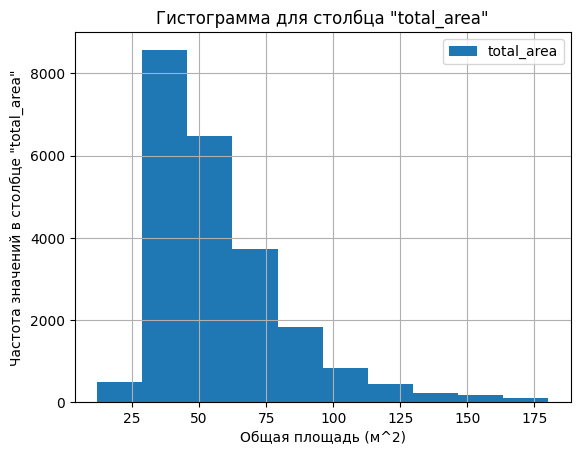

In [ ]:
ax = data.plot(kind='hist',
          y='total_area',
          grid=True,
         title = 'Гистограмма для столбца "total_area"');

ax.set_xlabel('Общая площадь (м^2)');
ax.set_ylabel('Частота значений в столбце "total_area"');

In [ ]:
data['total_area'].describe() # выведем числовое описание данных

count    22791.00000
mean        57.49582
std         24.80661
min         12.00000
25%         40.00000
50%         51.70000
75%         68.10000
max        180.10000
Name: total_area, dtype: float64

Видим, что для столбца 'total_area' наиболее часто встречаются значения от 28.80 до 45.60 квадратных метра. Медиана равна 51.70. Среднее значение равно 57.50. Значения больше 180.10 квадратных метров практически не встречаются.

**Рассмотрим столбец 'living_area', который отображает жилую площадь.**

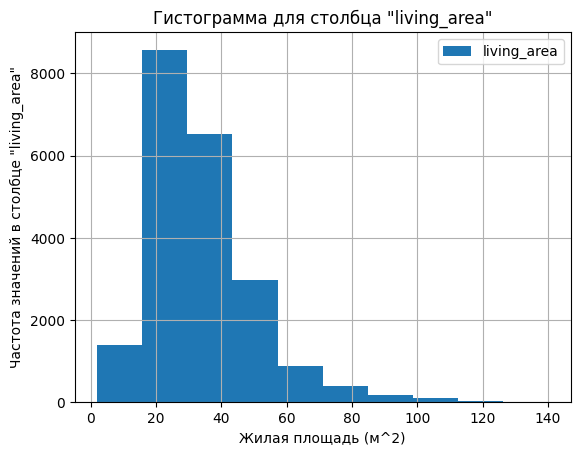

In [ ]:
ax = data.plot(kind='hist',
          y='living_area',
          grid=True,
         title = 'Гистограмма для столбца "living_area"');

ax.set_xlabel('Жилая площадь (м^2)');
ax.set_ylabel('Частота значений в столбце "living_area"');

In [ ]:
data['living_area'].describe() # выведем числовое описание данных

count    20979.000000
mean        32.846364
std         16.303673
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        140.000000
Name: living_area, dtype: float64

Видим, что для столбца 'living_area' наиболее часто встречаются значения от 15.8 до 29.6. Медиана равна 30. Среднее значение равно 32.85. Значения больше 98.6 квадратный метров практически не встречаются.

**Рассмотрим столбец 'kitchen_area', который отображает площадь кухни.**

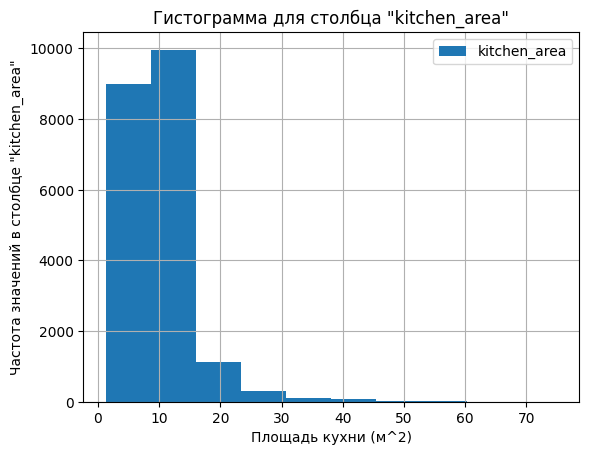

In [ ]:
ax = data.plot(kind='hist',
          y='kitchen_area',
          grid=True,
         title = 'Гистограмма для столбца "kitchen_area"');

ax.set_xlabel('Площадь кухни (м^2)');
ax.set_ylabel('Частота значений в столбце "kitchen_area"');

In [ ]:
data['kitchen_area'].describe() # выведем числовое описание данных

count    20619.000000
mean        10.307509
std          5.153035
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         75.000000
Name: kitchen_area, dtype: float64

Видим, что для столбца 'kitchen_area' наиболее часто встречаются значения от 1.3 до 16.04. Медиана равна 9. Среднее значение равно 10.31. Значения больше 52.89 практически не встречаются.

**Рассмотрим столбец 'last_price', который отображает цену объекта.**

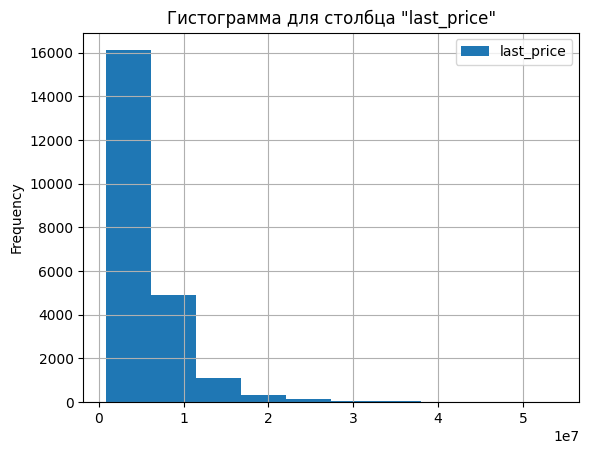

In [ ]:
data.plot(kind='hist',
          y='last_price',
          grid=True,
         title = 'Гистограмма для столбца "last_price"');


Разделим значения столбца 'last_price' на 10^6, чтобы мы видели значения в млн рублей.

In [ ]:
data['last_price'] = data['last_price']/1000000

In [ ]:
data['last_price'].head() # проверим, как отображается данный столбец

0    13.000
1     3.350
2     5.196
4    10.000
5     2.890
Name: last_price, dtype: float64

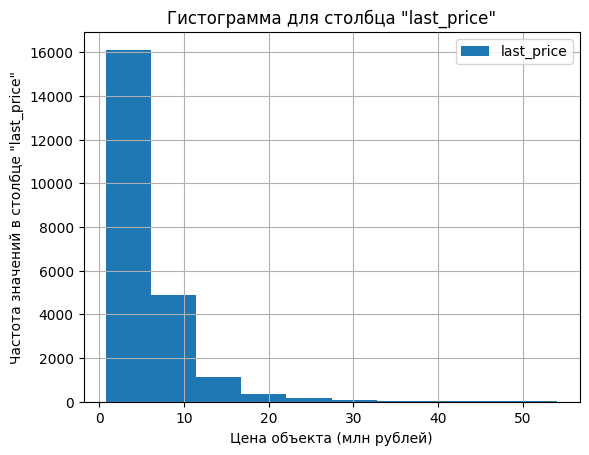

In [ ]:
ax = data.plot(kind='hist',
          y='last_price',
          grid=True,
         title = 'Гистограмма для столбца "last_price"');

ax.set_xlabel('Цена объекта (млн рублей)');
ax.set_ylabel('Частота значений в столбце "last_price"');

In [ ]:
data['last_price'].describe() # выведем числовое описание данных

count    22791.000000
mean         5.831285
std          4.551094
min          0.820000
25%          3.420000
50%          4.600000
75%          6.600000
max         54.000000
Name: last_price, dtype: float64

Видим, что для столбца 'last_price' наиболее часто встречаются значения от 820 тыс. рублей до 6.135 млн рублей. Медиана равна 4 млн 600 тыс.рублей. Среднее значение равно 5 млн 831 тыс. рублей. Значения больше 48 млн 682 тыс. рублей практически не встречаются.

**Рассмотрим столбец 'rooms', который отображает количество комнат.**

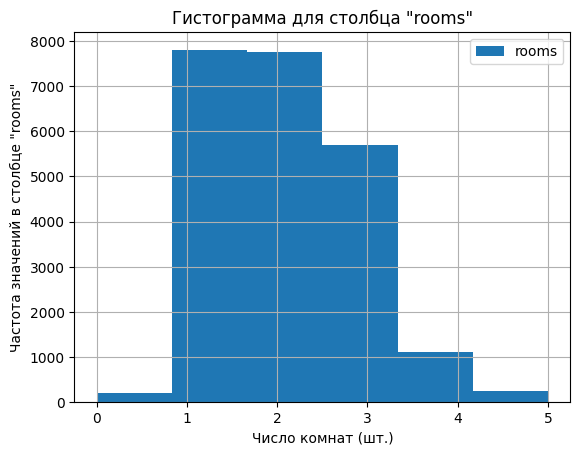

In [ ]:
ax = data.plot(kind='hist',
          y='rooms',
          grid=True,
          title = 'Гистограмма для столбца "rooms"',
          bins=6);

ax.set_xlabel('Число комнат (шт.)');
ax.set_ylabel('Частота значений в столбце "rooms"');

In [ ]:
data['rooms'].describe() # выведем числовое описание данных

count    22791.000000
mean         2.018253
std          0.955674
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Видим, что для столбца 'rooms' наиболее часто встречаются значения от 0.83 до 2.50, а так как в данном столбце значения с типом данных 'int64'(видим это при вызове метода info() в задании 2), то самыми часто встречаемыми значениями являются 1 и 2. Медиана равна 2. Среднее значение равно 2.02. Значения больше 5 не встречается.

**Рассмотрим столбец 'ceiling_height', который отображает высоту потолков.**

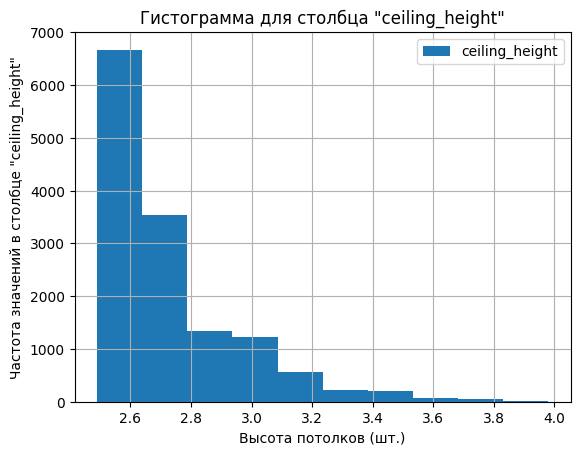

In [ ]:
ax = data.plot(kind='hist',
          y='ceiling_height',
          grid=True,
         title = 'Гистограмма для столбца "ceiling_height"');

ax.set_xlabel('Высота потолков (шт.)');
ax.set_ylabel('Частота значений в столбце "ceiling_height"');

In [ ]:
data['ceiling_height'].describe() # выведем числовое описание данных

count    13925.000000
mean         2.711495
std          0.239332
min          2.490000
25%          2.510000
50%          2.650000
75%          2.800000
max          3.980000
Name: ceiling_height, dtype: float64

Видим, что для столбца 'ceiling_height' наиболее часто встречаются значения от 2.49 до 2.64 м. Медиана равна 2.65 м. Среднее значение равно 2.71 м. Значения больше 3.98 м не встречаются.

**Рассмотрим столбец 'floor', который отображает этаж.**

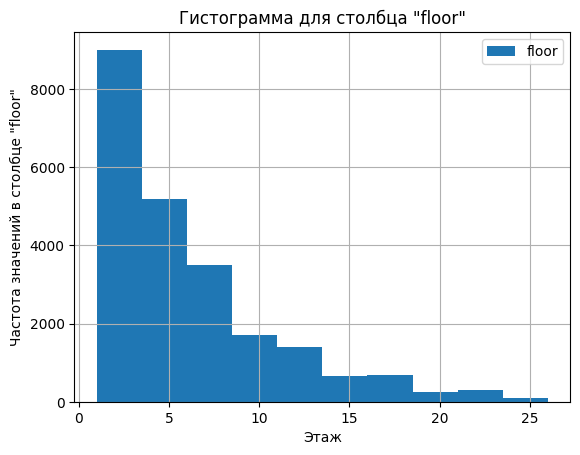

In [ ]:
ax = data.plot(kind='hist',
          y='floor',
          grid=True,
         title = 'Гистограмма для столбца "floor"');

ax.set_xlabel('Этаж');
ax.set_ylabel('Частота значений в столбце "floor"');

In [ ]:
data['floor'].describe() # выведем числовое описание данных

count    22791.000000
mean         5.841341
std          4.769658
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         26.000000
Name: floor, dtype: float64

Видим, что для столбца 'floor' наиболее часто встречаются значения от 1 до 3.5, а так как в данном столбце значения с типом данных 'int64'(видим это при вызове метода info() в задании 2), то самыми часто встречаемыми значениями являются 1, 2 и 3. Медиана равна 4.Среднее значение равно 5.84. Значения больше 26 не встречаются.

**Рассмотрим столбец 'floor_type', который отображает тип этажа квартиры («первый», «последний», «другой»).**

In [ ]:
data.groupby('floor_type')['floor_type'].count() # сгруппируем датафрейм data по столбцу 'floor_type' и отобразим значения
# и их количество методом count().

floor_type
другой       16838
первый        2819
последний     3134
Name: floor_type, dtype: int64

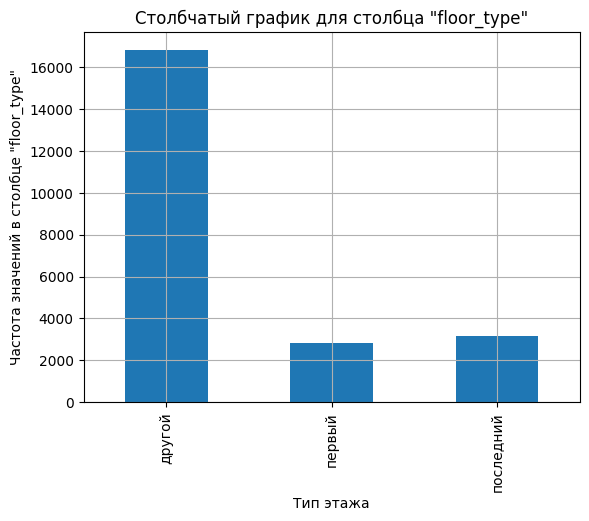

In [ ]:
ax = data.groupby('floor_type')['floor_type'].count().plot(kind='bar',
                                                     y='floor_type',
                                                     grid=True,
                                                     title = 'Столбчатый график для столбца "floor_type"');

ax.set_xlabel('Тип этажа');
ax.set_ylabel('Частота значений в столбце "floor_type"');

В столбца 'floor_type' три уникальных значения: "первый", "последний", "другой". Видим, что наиболее часто встречается значение "другой" - 16838 раз.

**Рассмотрим столбец 'floors_total', который отображает количество этажей в доме.**

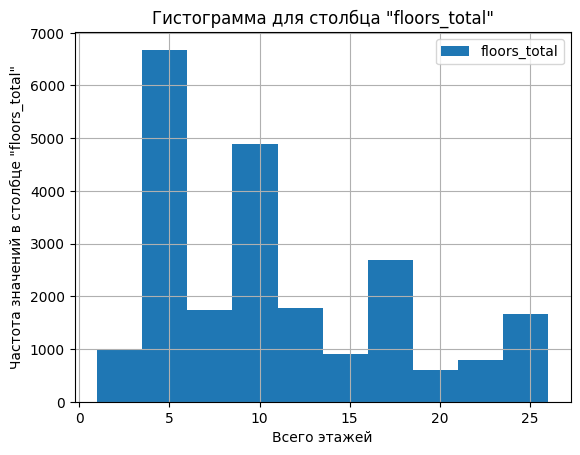

In [ ]:
ax = data.plot(kind='hist',
          y='floors_total',
          grid=True,
         title = 'Гистограмма для столбца "floors_total"');

ax.set_xlabel('Всего этажей');
ax.set_ylabel('Частота значений в столбце "floors_total"');

In [ ]:
data['floor'].describe() # выведем числовое описание данных

count    22791.000000
mean         5.841341
std          4.769658
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         26.000000
Name: floor, dtype: float64

In [ ]:
data['floors_total'].value_counts().head() # отобразим значения по убыванию и количество таких значений

5.0     5546
9.0     3732
16.0    1362
12.0    1347
10.0    1162
Name: floors_total, dtype: int64

Видим, что для столбца 'floors_total' наиболее часто встречаются значения 5 и 9, то есть пятиэтажные и девятиэтажные дома. Максимальное количество этажей для дома - 26.
Медиана равна 4. Среднее значение равно 5.84.

**Рассмотрим столбец 'cityCenters_nearest', который отображает расстояние до центра города в метрах.**

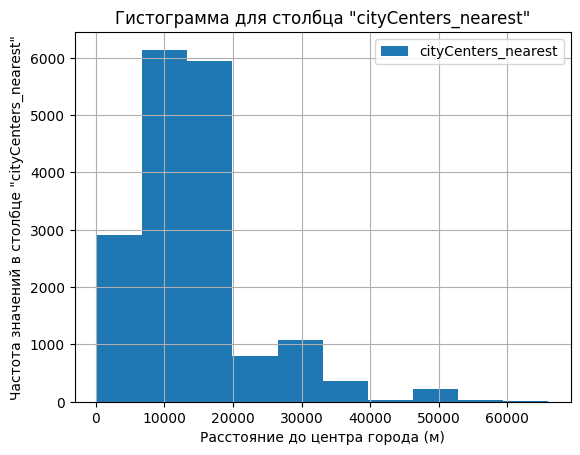

In [ ]:
ax = data.plot(kind='hist',
          y='cityCenters_nearest',
          grid=True,
         title = 'Гистограмма для столбца "cityCenters_nearest"');

ax.set_xlabel('Расстояние до центра города (м)');
ax.set_ylabel('Частота значений в столбце "cityCenters_nearest"');

In [ ]:
data['cityCenters_nearest'].describe() # выведем числовое описание данных

count    17534.000000
mean     14342.089483
std       8580.595272
min        181.000000
25%       9557.000000
50%      13171.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Видим, что для столбца 'cityCenters_nearest' наиболее часто встречаются значения от 6759.7 до 19917.1 м. Медиана равна 12995 м. Среднее значение равно 14342.09. Значения больше 65968 м не встречаются.

**Рассмотрим столбец 'airports_nearest', который отображает расстояние до ближайшего аэропорта в метрах.**

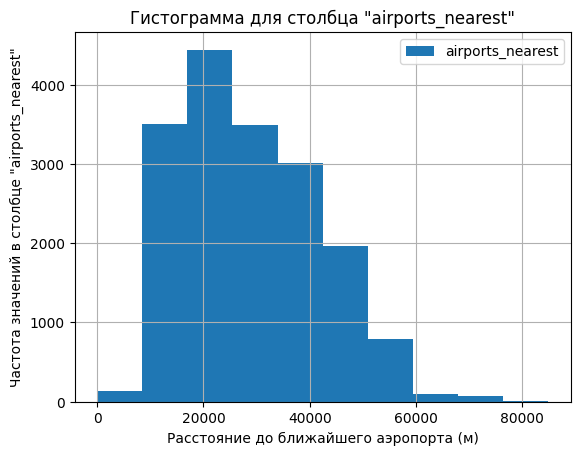

In [ ]:
ax = data.plot(kind='hist',
          y='airports_nearest',
          grid=True,
         title = 'Гистограмма для столбца "airports_nearest"');

ax.set_xlabel('Расстояние до ближайшего аэропорта (м)');
ax.set_ylabel('Частота значений в столбце "airports_nearest"');

In [ ]:
data['airports_nearest'].describe() # выведем числовое описание данных

count    17514.000000
mean     28791.169464
std      12667.901022
min          0.000000
25%      18428.000000
50%      26890.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Видим, что для столбца 'airports_nearest' наиболее часто встречаются значения от 16973.8 до 25460.7 м. Медиана равна 26890 м. Среднее значение равно 28791.17. Значения больше 84869 м не встречаются.

**Рассмотрим столбец 'parks_nearest', который отображает расстояние до ближайшего парка в метрах.**

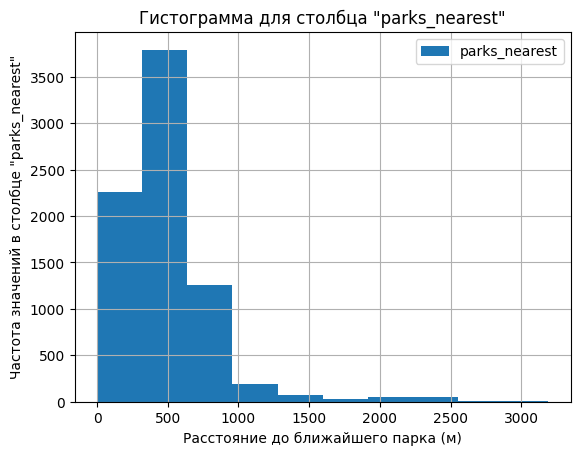

In [ ]:
ax = data.plot(kind='hist',
          y='parks_nearest',
          grid=True,
         title = 'Гистограмма для столбца "parks_nearest"');

ax.set_xlabel('Расстояние до ближайшего парка (м)');
ax.set_ylabel('Частота значений в столбце "parks_nearest"');

In [ ]:
data['parks_nearest'].describe() # выведем числовое описание данных

count    7721.000000
mean      492.684238
std       343.653701
min         1.000000
25%       288.000000
50%       455.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Видим, что для столбца 'parks_nearest' наиболее часто встречаются значения от 319.9 до 638.8 м. Медиана равна 455 м. Среднее значение равно 492.68. Значения больше 3190 м не встречаются.

**Рассмотрим столбец 'day_of_the_publication_week', который отображает день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).**

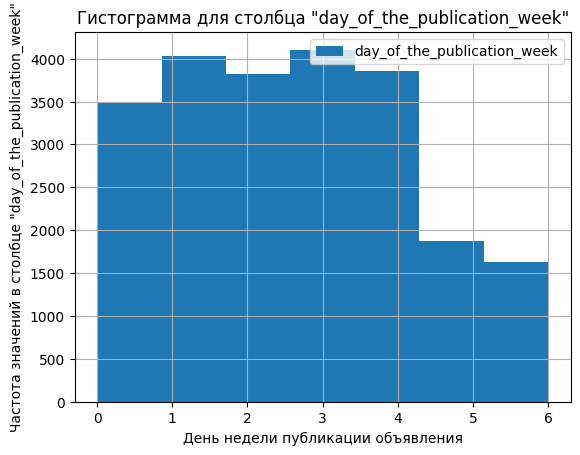

In [ ]:
ax = data.plot(kind='hist',
         y='day_of_the_publication_week',
         grid=True,
         title = 'Гистограмма для столбца "day_of_the_publication_week"',
         bins = 7,
         range=(0,6),
         );

ax.set_xlabel('День недели публикации объявления');
ax.set_ylabel('Частота значений в столбце "day_of_the_publication_week"');

In [ ]:
data['day_of_the_publication_week'].describe() # выведем числовое описание данных

count    22791.000000
mean         2.567549
std          1.790151
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_the_publication_week, dtype: float64

Видим, что чаще всего объявления публикуют во вторник и в четверг. Меньше всего объявлений публикуют на выходных - в субботу и в воскресенье.

**Рассмотрим столбец 'publication_month', который отображает месяц публикации объявления.**

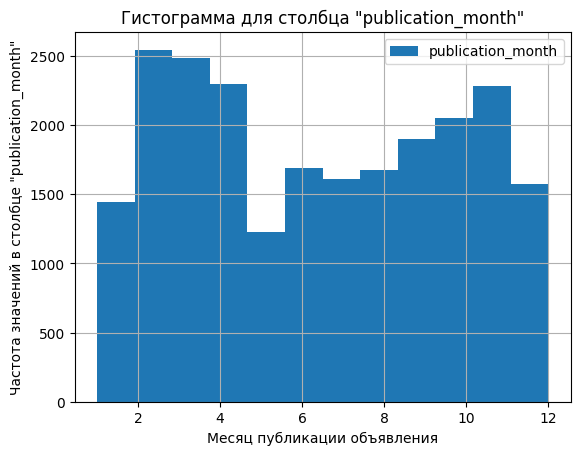

In [ ]:
ax = data.plot(kind='hist',
          y='publication_month',
          grid=True,
         title = 'Гистограмма для столбца "publication_month"',
         bins=12,
         range=(1,12));

ax.set_xlabel('Месяц публикации объявления');
ax.set_ylabel('Частота значений в столбце "publication_month"');

In [ ]:
data['publication_month'].describe() # выведем числовое описание данных

count    22791.000000
mean         6.395902
std          3.493483
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64

Видим, что чаще всего объявления публикуют в феврале и в марте. Меньше всего объявлений публикуют в мае.

### Задание 4.2. Изучите, как быстро продавались квартиры (столбец 'days_exposition')

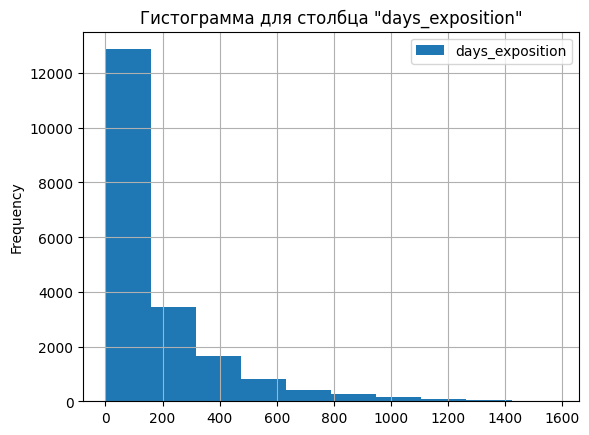

In [ ]:
data.plot(kind='hist',
          y='days_exposition',
          grid=True,
         title = 'Гистограмма для столбца "days_exposition"');

In [ ]:
data['days_exposition'].describe()

count    19795.000000
mean       179.106643
std        218.122000
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что для столбца 'days_exposition' наиболее часто встречаются значения от 1 до 158.9 дней. Медниана равна 103 дня. Среднее значение равно 189.42 дня. Значения больше 1580 дней не встречаются. Необычно долгими считаются продажи более 1264.2 дней (это отрезок времени, который характеризует последние 2 столбца на гистограмме).

Рассмотрим отдельно диапазон от 0 до 100 дней.

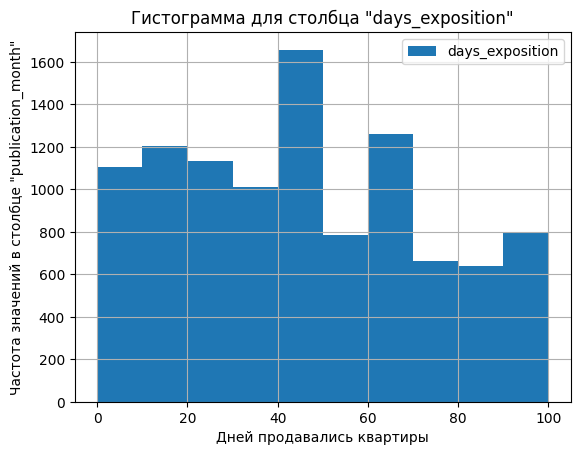

In [ ]:
ax = data.plot(kind='hist',
          y='days_exposition',
          grid=True,
          title = 'Гистограмма для столбца "days_exposition"',
          range=(0,100));

ax.set_xlabel('Дней продавались квартиры');
ax.set_ylabel('Частота значений в столбце "publication_month"');

Видим, что пики продажи квартир в диапазоне от 0 до 100 дней приходятся на промежуток от 40 до 50 дней и от 60 до 70 дней.
Это особенность функционирования системы размещения объявлений, которую можем увидеть по ссылке https://yandex.ru/support/realty/owner/home/add-ads-housing.html. Срок публикации объявлений для квартир до 4.5 млн - 45 дней; от 4.5 до 10 млн - 60 дней; от 10 млн - 90 дней.

### Задание 4.3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Изучим, как зависит цена от общей площади.**

Построим диаграмму рассеяния для этих двух столбцов

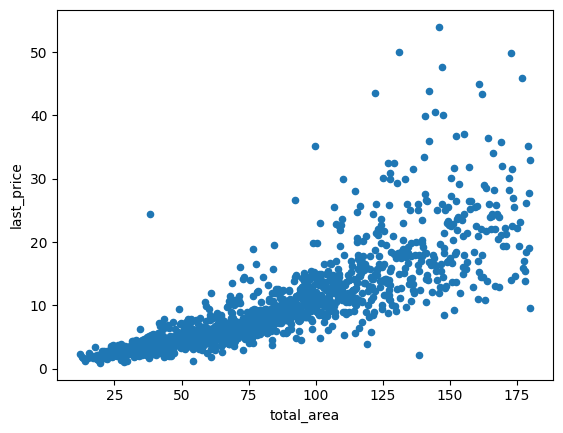

In [ ]:
(data.pivot_table(index='total_area',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='total_area', y='last_price')
);


Рассчитаем коэффициент корреляции

In [ ]:
(data.pivot_table(index='total_area',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .corr()
)

,total_area,last_price
total_area,1.00000,0.83878
last_price,0.83878,1.00000


Коэффициент корреляции равен 0.84.

**Изучим, как зависит цена от жилой площади.**

Построим диаграмму рассеяния для этих двух столбцов

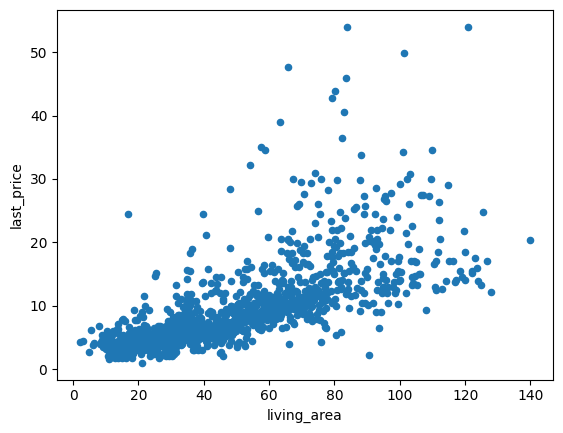

In [ ]:
(data.pivot_table(index='living_area',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='living_area', y='last_price')
);


Рассчитаем коэффициент корреляции

In [ ]:
(data.pivot_table(index='living_area',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .corr()
)

,living_area,last_price
living_area,1.000000,0.736804
last_price,0.736804,1.000000


Коэффициент корреляции равен 0.74

**Изучим, как зависит цена от площади кухни.**

Построим диаграмму рассеяния для этих двух столбцов

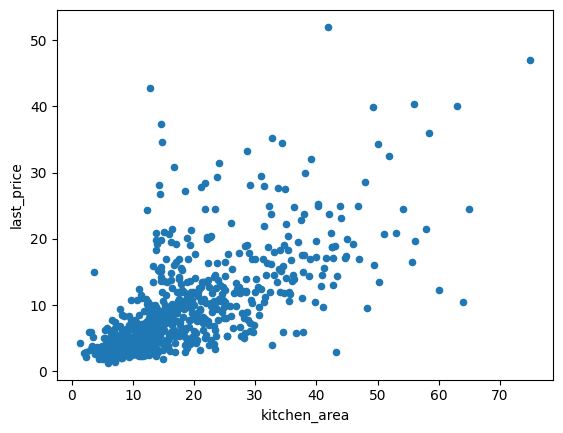

In [ ]:
(data.pivot_table(index='kitchen_area',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='kitchen_area', y='last_price')
);


Рассчитаем коэффициент корреляции

In [ ]:
(data.pivot_table(index='kitchen_area',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .corr()
)

,kitchen_area,last_price
kitchen_area,1.000000,0.703451
last_price,0.703451,1.000000


Коэффициент корреляции равен 0.70

**Изучим, как зависит цена от количества комнат.**

Построим диаграмму рассеяния для этих двух столбцов

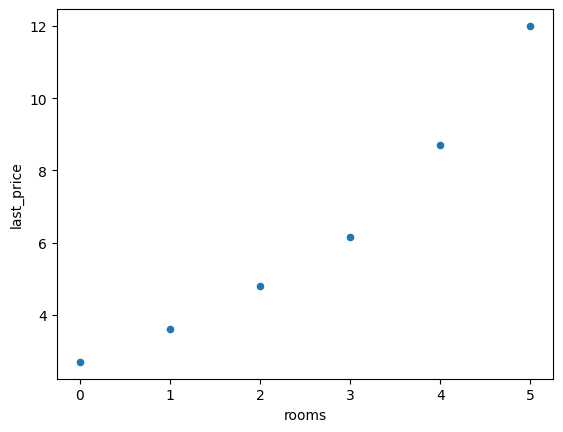

In [ ]:
(data.pivot_table(index='rooms',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='rooms', y='last_price')
);

Рассчитаем коэффициент корреляции

In [ ]:
(data.pivot_table(index='rooms',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .corr()
)

,rooms,last_price
rooms,1.000000,0.968159
last_price,0.968159,1.000000


Коэффициент корреляции равен 0.97

**Изучим, как зависит цена от этажа, на котором расположена квартира (первый, последний, другой)**

Построим диаграмму рассеяния для этих двух столбцов

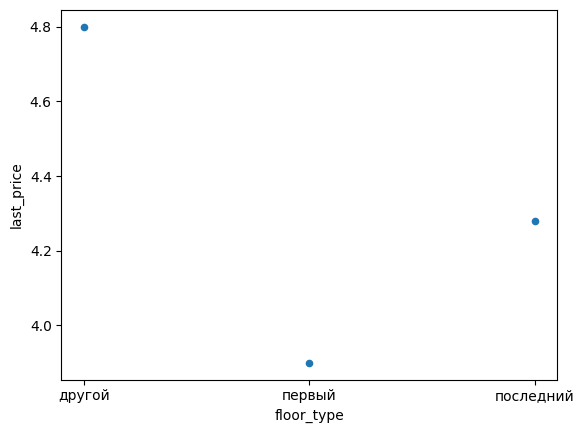

In [ ]:
(data.pivot_table(index='floor_type',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='floor_type', y='last_price')
);

Рассчитаем коэффициент корреляции

In [ ]:
(data.pivot_table(index='floor_type',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .corr()
)

<ipython-input-89-6787211c920a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .corr()


,last_price
last_price,1.0


Для 'floor_type' нельзя рассчитать коэффициент корреляции, так как этот столбец не принимает численных значений.

**Изучим, как зависит цена от дня недели публикации объявления.**

Построим диаграмму рассеяния для этих двух столбцов

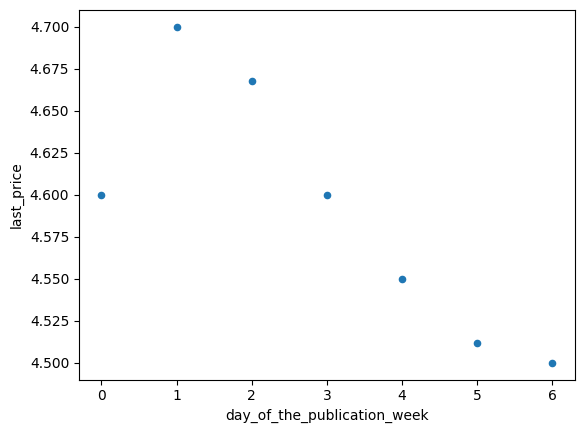

In [ ]:
(data.pivot_table(index='day_of_the_publication_week',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='day_of_the_publication_week', y='last_price')
);

Рассчитывать корреляцию Пирсона для дня недели публикации объявления неэффективно, так как цена в данном случае зависит от него нелинейно. Чтобы изучить зависимость для этого параметра лучше построить bar, plot или гистограмму, рассчитав среднее значение или медиану. Данный график изображён выше.

**Изучим, как зависит цена от месяца публикации объявления.**

Построим диаграмму рассеяния для этих двух столбцов

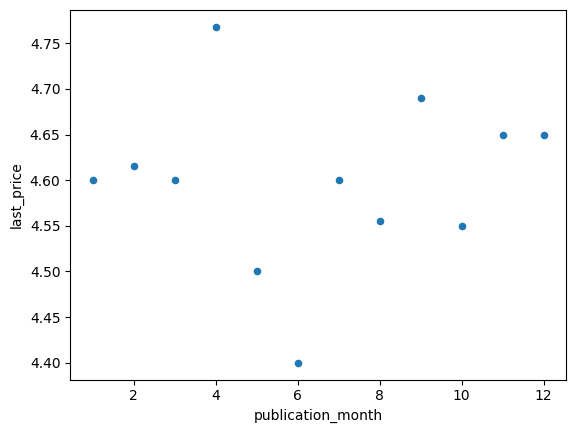

In [ ]:
(data.pivot_table(index='publication_month',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='publication_month', y='last_price')
);

Рассчитывать корреляцию Пирсона для месяца публикации объявления неэффективно, так как цена в данном случае зависит от него нелинейно. Чтобы изучить зависимость для этого параметра лучше построить bar, plot или гистограмму, рассчитав среднее значение или медиану. Данный график изображён выше.

**Изучим, как зависит цена от года публикации объявления.**

Построим диаграмму рассеяния для этих двух столбцов

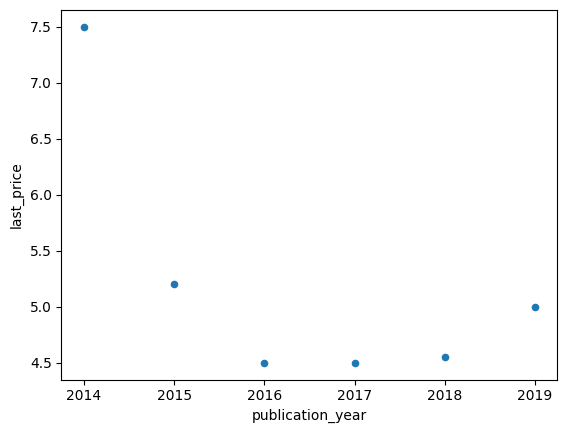

In [ ]:
(data.pivot_table(index='publication_year',
                  values='last_price',
                  aggfunc='median')
 .reset_index()
 .plot(kind='scatter', x='publication_year', y='last_price')
);

Рассчитывать корреляцию Пирсона для года публикации неэффективно, так как цена в данном случае зависит от него нелинейно. Чтобы изучить зависимость для этого параметра лучше построить bar, plot или гистограмму, рассчитав среднее значение или медиану. Данный график изображён выше.

**Вывод к заданию 4.3.** На общую (полную) стоимость объекта больше всего влияет количество комнат (коэффициент корреляции 0.97).

### Задание 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
cities_with_top10_listings = data['locality_name'].value_counts().head(10).index
cities_with_top10_listings # отобразим список из 10 городов с самым большим количеством объявлений

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Гатчина', 'Парголово', 'Выборг'],
      dtype='object')

Создадим датафрейм со средней ценой за квадратный метр для 10 городов с самым большим количеством объявлений

In [ ]:
columns = ['Город', 'Средняя цена за квадратный метр']
data_1 = []
for value in cities_with_top10_listings:
    average_price_for_meter_in_city = data[data['locality_name']==value]['price_per_square_meter'].mean()
    average_price_for_meter_in_city = round(average_price_for_meter_in_city, 2)
    data_1.append([value,average_price_for_meter_in_city])
average_price_for_meter_in_city = pd.DataFrame(data=data_1, columns=columns)
average_price_for_meter_in_city = average_price_for_meter_in_city.sort_values(by='Средняя цена за квадратный метр',\
                                                                              ascending=False).reset_index(drop=True)
average_price_for_meter_in_city

,Город,Средняя цена за квадратный метр
0,Санкт-Петербург,112211.55
1,Пушкин,102802.46
2,Кудрово,95348.47
3,Парголово,89100.93
4,Мурино,86108.68
5,Шушары,78701.89
6,Колпино,75352.48
7,Гатчина,68811.37
8,Всеволожск,68617.06
9,Выборг,58505.59


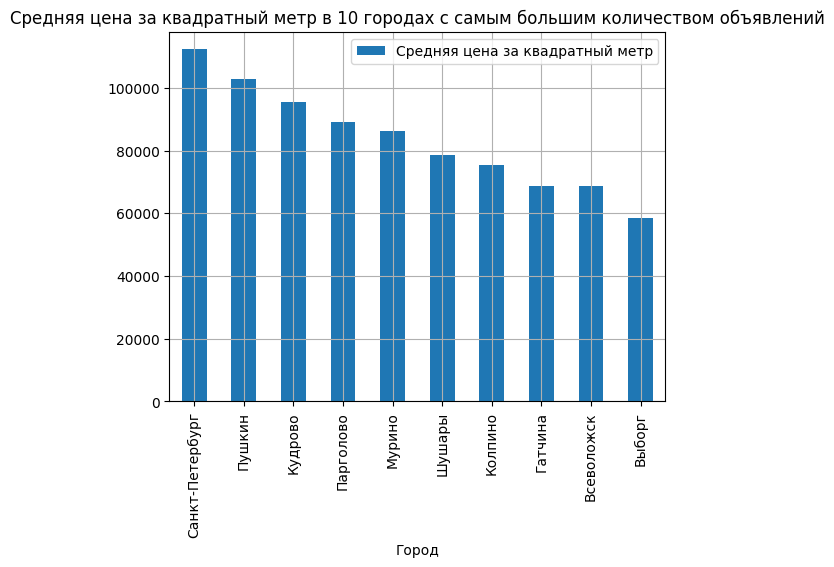

In [ ]:
average_price_for_meter_in_city.plot(kind='bar',
                                     y='Средняя цена за квадратный метр',
                                     x='Город',
                                     grid=True,
                                     title = 'Средняя цена за квадратный метр в 10 городах с самым большим количеством \
объявлений');

Самая высокая цена за квадратный метр оказалась в Санкт-Петербурге - 112211.55 рублей за квадратный метр. Самая низкая - в Выборге - 58505.59 рублей за квадратный метр.

### Задание 4.5.  Вычислите среднюю цену каждого километра от центра Санкт-Петербурга.

In [ ]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург'] # отфильтруем датафрейм по объявленим только из Санкт-Петербурга
# 'city_center_in_km' - столбец, в котором из м расстояние переведено в км
data_spb_pivot_table = data_spb.pivot_table(index='city_center_in_km',
                    values='price_per_square_meter').reset_index() # создадим сводную таблицу
data_spb_pivot_table.head()

,city_center_in_km,price_per_square_meter
0,0.0,220897.441579
1,1.0,145880.587925
2,2.0,138032.357061
3,3.0,118986.428145
4,4.0,127918.505946


In [ ]:
for index in range(len(data_spb_pivot_table)-1):
    data_spb_pivot_table.loc[index,'delta'] = (data_spb_pivot_table.loc[index,'price_per_square_meter'] -\
                                               data_spb_pivot_table.loc[index+1, 'price_per_square_meter'])
data_spb_pivot_table.head()
# создадим столбец 'delta', чтобы посчитать разницу между 'price_per_square_meter' текущего км и price_per_square_meter
# следующего км.


,city_center_in_km,price_per_square_meter,delta
0,0.0,220897.441579,75016.853654
1,1.0,145880.587925,7848.230863
2,2.0,138032.357061,19045.928916
3,3.0,118986.428145,-8932.077801
4,4.0,127918.505946,-9191.053562


In [ ]:
mean_price_for_km = data_spb_pivot_table['delta'].mean().round() # посчитаем среднее значение delta и округлим его
# до целого числа

In [ ]:
print(f'Изменение цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра равно \
{mean_price_for_km} рубля за квадратный метр.')

Изменение цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра равно 5102.0 рубля за квадратный метр.


**Вывод к шагу 4**  

В задании 4.1 мы изучили параметры столбцов 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_of_the_publication_week', 'publication_month'. Выяснили, что:
- Для столбца 'total_area', который отображает общую площадь, наиболее часто встречаются значения от 28.80 до 45.60 квадратных метров. Медиана равна 51.70. Среднее значение равно 57.50. Значения больше 180.10 квадратных метров практически не встречаются.
- Для столбца 'living_area', который отображает жилую площадь, наиболее часто встречаются значения от 15.8 до 29.6. Медиана равна 30. Среднее значение равно 32.85. Значения больше 98.6 квадратный метров практически не встречаются.
- Для столбца 'kitchen_area', который отображает площадь кухни, наиболее часто встречаются значения от 1.3 до 16.04. Медиана равна 9. Среднее значение равно 10.31. Значения больше 52.89 практически не встречаются.
- Для столбца 'last_price', который отображает цену объекта, наиболее часто встречаются значения от 820 тыс. рублей до 6.135 млн рублей. Медиана равна 4 млн 600 тыс.рублей. Среднее значение равно 5 млн 831 тыс. рублей. Значения больше 48 млн 682 тыс. рублей практически не встречаются.
- Для столбца 'rooms', который отображает количество комнат, наиболее часто встречаются значения от 0.83 до 2.50, а так как в данном столбце значения с типом данных 'int64', то самыми часто встречаемыми значениями являются 1 и 2. Медиана равна 2. Среднее значение равно 2.02. Значения больше 5 не встречается.
- Для столбца 'ceiling_height', который отображает высоту потолков, наиболее часто встречаются значения от 2.49 до 2.64 м. Медиана равна 2.65 м. Среднее значение равно 2.71 м. Значения больше 3.98 м не встречаются.
- Для столбца 'floor', который отображает этаж, наиболее часто встречаются значения от 1 до 3.5, а так как в данном столбце значения с типом данных 'int64', то самыми часто встречаемыми значениями являются 1, 2 и 3. Медиана равна 4.Среднее значение равно 5.84. Значения больше 26 не встречаются.
- Для столбца 'floor_type', который отображает тип этажа квартиры («первый», «последний», «другой»), наиболее часто встречается значение "другой" - 16838 раз.
- Для столбца 'floors_total', который отображает количество этажей в доме, наиболее часто встречаются значения 5 и 9, то есть пятиэтажные и девятиэтажные дома. Максимальное количество этажей для дома - 26. Медиана равна 4. Среднее значение равно 5.84.
- Для столбца 'cityCenters_nearest', который отображает расстояние до центра города в метрах, наиболее часто встречаются значения от 6759.7 до 19917.1 м. Медиана равна 12995 м. Среднее значение равно 14342.09. Значения больше 65968 м не встречаются.
- Для столбца 'airports_nearest', который отображает расстояние до ближайшего аэропорта в метрах, наиболее часто встречаются значения от 16973.8 до 25460.7 м. Медиана равна 26890 м. Среднее значение равно 28791.17. Значения больше 84869 м не встречаются.
- Для столбца 'parks_nearest', который отображает расстояние до ближайшего парка в метрах, наиболее часто встречаются значения от 319.9 до 638.8 м. Медиана равна 455 м. Среднее значение равно 492.68. Значения больше 3190 м не встречаются.
- Для столбца 'day_of_the_publication_week', который отображает день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), чаще всего объявления публикуют во вторник и в четверг. Меньше всего объявлений публикуют на выходных - в субботу и в воскресенье.
- Для столбца 'publication_month', который отображает месяц публикации объявления, чаще всего объявления публикуют в феврале и в марте. Меньше всего объявлений публикуют в мае.

В задании 4.2 мы изучили, как быстро продавались квартиры (столбец 'days_exposition'). Для столбца 'days_exposition'  наиболее часто встречаются значения от 1 до 158.9 дней. Медниана равна 103 дня. Среднее значение равно 189.42 дня. Значения больше 1580 дней не встречаются. Необычно долгими считаются продажи более 1264.2 дней (это отрезок времени, который характеризует последние 2 столбца на гистограмме). Также можем отметить, что пики продаж квартир в диапазоне от 0 до 100 дней приходятся на промежуток от 40 до 50 дней и от 60 до 70 дней.
    
В задании 4.3 мы изучили, какие факторы больше всего влияют на общую (полную) стоимость объекта. Больше всего на общую (полную) стоимость влияет количество комнат (коэффициент корреляции 0.97).

В задании 4.4 мы посчитали среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая цена за квадратный метр оказалась в Санкт-Петербурге - 112211.55 рублей. Самая низкая - в Выборге - 58505.59 рублей за квадратный метр.

В задании 4.5 мы вычислили изменение цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра, оно оказалось равно 5102.0 рубля за квадратный метр при удалении на 1 км от центра.

## Шаг 5. Общий вывод

В проекте нам были предоставлены данные сервиса Яндекс Недвижимость - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Нашей задачей было выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

На первом шаге мы загрузили данные из файла в датафрейм, изучили информацию из данного датафрейма, построили гистограммы для всех числовых столбцов таблицы. В 14 из 22 столбцов датафрейма обнаружили пропуски.

На втором шаге мы занимались предобработкой данных. В задании 2.1 заполнили пропуски в столбце 'locality_name' значением 'unknown'. В задании 2.2 изменили тип данных для столбца 'first_day_exposition', который отображает дату публикации объявления, на 'datetime64'. В задании 2.3 устранили неявные дубликаты в столбце 'locality_name' с названиями населённых пунктов. В задании 2.4 устранили аномальные значения в столбцах 'last_price', 'ceiling_height', 'floors_total', 'rooms', 'total_area'.

На третьем шаге добавили новые столбцы:
- 'price_per_square_meter' с ценой одного квадратного метра,
- 'day_of_week' с днём недели публикации объявления (0-понедельник, 1-вторник и так далее),
- 'publication_month' с месяцем публикации объявления,
- 'publication_year' с годом публикации объявления,
- 'floor_type', который отображает тип этажа квартиры("первый", "последний", "другой"),
- 'city_center_in_km', который показывает расстояние до центра города в километрах.

На шаге 4 мы провели исследовательский анализ данных.
В задании 4.1 мы изучили параметры столбцов 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_of_the_publication_week', 'publication_month'. Выяснили, что:
- Для столбца 'total_area', который отображает общую площадь, наиболее часто встречаются значения от 28.80 до 45.60 квадратных метров. Медиана равна 51.70. Среднее значение равно 57.50. Значения больше 180.10 квадратных метров практически не встречаются.
- Для столбца 'living_area', который отображает жилую площадь, наиболее часто встречаются значения от 15.8 до 29.6. Медиана равна 30. Среднее значение равно 32.85. Значения больше 98.6 квадратный метров практически не встречаются.
- Для столбца 'kitchen_area', который отображает площадь кухни, наиболее часто встречаются значения от 1.3 до 16.04. Медиана равна 9. Среднее значение равно 10.31. Значения больше 52.89 практически не встречаются.
- Для столбца 'last_price', который отображает цену объекта, наиболее часто встречаются значения от 820 тыс. рублей до 6.135 млн рублей. Медиана равна 4 млн 600 тыс.рублей. Среднее значение равно 5 млн 831 тыс. рублей. Значения больше 48 млн 682 тыс. рублей практически не встречаются.
- Для столбца 'rooms', который отображает количество комнат, наиболее часто встречаются значения от 0.83 до 2.50, а так как в данном столбце значения с типом данных 'int64', то самыми часто встречаемыми значениями являются 1 и 2. Медиана равна 2. Среднее значение равно 2.02. Значения больше 5 не встречается.
- Для столбца 'ceiling_height', который отображает высоту потолков, наиболее часто встречаются значения от 2.49 до 2.64 м. Медиана равна 2.65 м. Среднее значение равно 2.71 м. Значения больше 3.98 м не встречаются.
- Для столбца 'floor', который отображает этаж, наиболее часто встречаются значения от 1 до 3.5, а так как в данном столбце значения с типом данных 'int64', то самыми часто встречаемыми значениями являются 1, 2 и 3. Медиана равна 4.Среднее значение равно 5.84. Значения больше 26 не встречаются.
- Для столбца 'floor_type', который отображает тип этажа квартиры («первый», «последний», «другой»), наиболее часто встречается значение "другой" - 16838 раз.
- Для столбца 'floors_total', который отображает количество этажей в доме, наиболее часто встречаются значения 5 и 9, то есть пятиэтажные и девятиэтажные дома. Максимальное количество этажей для дома - 26. Медиана равна 4. Среднее значение равно 5.84.
- Для столбца 'cityCenters_nearest', который отображает расстояние до центра города в метрах, наиболее часто встречаются значения от 6759.7 до 19917.1 м. Медиана равна 12995 м. Среднее значение равно 14342.09. Значения больше 65968 м не встречаются.
- Для столбца 'airports_nearest', который отображает расстояние до ближайшего аэропорта в метрах, наиболее часто встречаются значения от 16973.8 до 25460.7 м. Медиана равна 26890 м. Среднее значение равно 28791.17. Значения больше 84869 м не встречаются.
- Для столбца 'parks_nearest', который отображает расстояние до ближайшего парка в метрах, наиболее часто встречаются значения от 319.9 до 638.8 м. Медиана равна 455 м. Среднее значение равно 492.68. Значения больше 3190 м не встречаются.
- Для столбца 'day_of_the_publication_week', который отображает день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), чаще всего объявления публикуют во вторник и в четверг. Меньше всего объявлений публикуют на выходных - в субботу и в воскресенье.
- Для столбца 'publication_month', который отображает месяц публикации объявления, чаще всего объявления публикуют в феврале и в марте. Меньше всего объявлений публикуют в мае.

В задании 4.2 мы изучили, как быстро продавались квартиры (столбец 'days_exposition'). Для столбца 'days_exposition'  наиболее часто встречаются значения от 1 до 158.9 дней. Медниана равна 103 дня. Среднее значение равно 189.42 дня. Значения больше 1580 дней не встречаются. Необычно долгими считаются продажи более 1264.2 дней (это отрезок времени, который характеризует последние 2 столбца на гистограмме). Также можем отметить, что пики продаж квартир в диапазоне от 0 до 100 дней приходятся на промежуток от 40 до 50 дней и от 60 до 70 дней.
    
В задании 4.3 мы изучили, какие факторы больше всего влияют на общую (полную) стоимость объекта. Больше всего на общую (полную) стоимость влияет количество комнат (коэффициент корреляции 0.97).

В задании 4.4 мы посчитали среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая цена за квадратный метр оказалась в Санкт-Петербурге - 112211.55 рублей. Самая низкая - в Выборге - 58505.59 рублей за квадратный метр.

В задании 4.5 мы вычислили изменение цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра, оно оказалось равно 5102.0 рубля за квадратный метр при удалении на 1 км от центра.